# Latex Word Counter

Counts the words inside .tex files

## Counts as words:
normal text


## Doesn't count
headers

footers

etc

In [1]:
import texwordcounter

In [2]:

path = '/Users/diogoaguiam/Docz/University/DEFT/Thesis/TeseLatex/'
count = texwordcounter.tex_word_count(path=path)

print (count)


39258


In [150]:
import subprocess
import os
import time

tmp_dir = 'tmp'
tmp_dir = 'tmp/thesis-phd/'
git_repo = "https://github.com/daguiam/thesis-phd.git"

# git_repo = "https://git.overleaf.com/9445788zffrcsgtbwhs"
# cwd = os.path.dirname(os.path.realpath(__file__)) 


cwd = os.path.dirname('.')
cwd = os.path.join(cwd,tmp_dir)

# data = subprocess.check_output(["git", "clone", git_repo, cwd],).decode("utf-8") 
# print (data)

# p = subprocess.Popen(["git", "checkout", "master"], cwd=cwd, stdout=subprocess.PIPE)
data = subprocess.check_output(["git", "checkout", "master"], cwd=cwd,).decode("utf-8") 
print (data)
data = subprocess.check_output(["git", "rev-list", "--branches"], cwd=cwd,).decode("utf-8") 
print (data)
data = subprocess.check_output(["git", "log", "--pretty=%H"], cwd=cwd, ).decode("utf-8") 
print (data)
commit_list = str(data).split('\n')
# print(commit_list)

data = subprocess.check_output(["git", "log", "--pretty=%ct"], cwd=cwd, ).decode("utf-8") 
print (data)
date_list = str(data).split('\n')
# print(date_list)


# if 1:
count_list = []
for commit,date in zip(commit_list,date_list):
# for commit,date in zip(reversed(commit_list),reversed(date_list)):
    print (date,commit)
    p = subprocess.Popen(["git", "checkout", commit], cwd=cwd, stdout=subprocess.PIPE)
    path = cwd
    time.sleep(0.2)
    count = texwordcounter.tex_word_count(path=path, skip_commands=True)
    count_list.append(count)
    print (count)




Your branch is up-to-date with 'origin/master'.

6257398bc864ed98fbdffc2a49ada749b758f02d
7dc0ed2af41f2979c082825de53f748c6f061c09
2c4f76e88ccac2c53143a60dbfea169ca21e3c21
bacb3dda65504afee97c8358a7dcc37aaeb9b30d
4876b9d3655b1c4be08dfdb219cab3bc93db58d6
e3ddb48429af65bd472edcae03aeccc6e398a76b
133c72d795acd2d648daa486bc41c65b2c23e763
0c6b5be850b99d04ba254bb16ded64396144bbfb
15ca142330bb5a356261b43d747482b0a15bef5b
bcdf2150983a122acfaf2984ca320c1b6246408b
66b7ed6cca93386f093308c60db26d4b019bc24a
9ea85b1d7a21aa8a2e0eb004c2d962bcac9bbc28
57f10a33bae21cf27ed9e7c132f467fc8b716408
417a9fc3d856bc983905a7277eda9b7dd7f81582
30c9d7380050d386b5a991ac3e51dd0347c55c15
100afcff1eab0d878839dc725442b9ea8ad37985
265d9d6afa3358e152a8ebf8bbbf4204f361913e
12ea1208f177d68850b1ecf8c81f07db8d9a16c3
c30c8578170c74cc7bb204fe9b885a5f41bae767
05c3fe649af9851043b1c4c53815ab350035b138
7794b89ab60395c0462e135b0e0b774fdf1ac329
973f5f0780014fa37cfc3268b8cd01e408f398e2
526736d440a1d0961384c7e3d733da2423588705
b705d3db

In [144]:
print(len(date_list),len(commit_list),len(count_list))

3 3 3


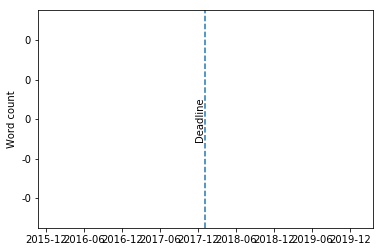

In [145]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
import numpy as np

%matplotlib inline
date_list2 = date_list.copy()
for i in range(len(date_list)-1):
    date_list2[i] = datetime.strptime(date_list2[i], "%c %z")
    pass

plt.plot(date_list2[:-4],count_list[:-4])
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

deadline = datetime.strptime("Wed Jan 5 00:00:00 2018", "%c")
plt.axvline(deadline, linestyle='--',)
plt.text(deadline, np.mean(count_list), 'Deadline', rotation=90, ha='right',va='center')
plt.ylabel('Word count')
plt.savefig('thesis-word-count.png')

In [9]:
import git

ModuleNotFoundError: No module named 'git'

In [8]:
from texwordcounter import *

In [39]:
if 1:
    FNULL = open(os.devnull, 'w')

    path='./tmp/thesis-phd/'
    output='wordcount.csv'
    
    
    cwd = os.path.dirname(path)
    isRepo = False
    # Verifies if it is a git repository to iterate over commits
    try:
        data = subprocess.call(["git", "stash",], cwd=cwd, stdout=FNULL, stderr=subprocess.STDOUT)
        data = subprocess.call(["git", "checkout", "master"], cwd=cwd, stdout=FNULL, stderr=subprocess.STDOUT)

        isRepo = True
        #print('Is repo')
    except subprocess.CalledProcessError as e:
        #print e.output
        data = -1
        isRepo = False
#         return

    # Gets commit hashes
    data = subprocess.check_output(["git", "log", "--pretty=%H"], cwd=cwd, ).decode("utf-8") 
    commit_list = str(data).split('\n')

    # Gets commit timestamps
    data = subprocess.check_output(["git", "log", "--pretty=%ct"], cwd=cwd, ).decode("utf-8") 
    date_list = str(data).split('\n')
    valididx = [d != '' for d in date_list]
    date_list = [date_list[i] for i in range(len(date_list)) if valididx[i] ]
    commit_list = [commit_list[i] for i in range(len(commit_list)) if valididx[i] ]

#     print (valididx)
#     date_list = [d  for d in date_list if d != '']
#     print (valididx)
#     date_list = [d  for d in date_list if d != '']
#     date_list = [d  for d in date_list if d != '']
    
    datestr_list = []
    for i in range(len(date_list)):
        datestr_list.append(datetime.datetime.fromtimestamp(float(date_list[i])))

        
    total = len(date_list)
    print("Total commits: %d"%(total))

    count_list = []
    for i, (commit, date) in enumerate(zip(commit_list,date_list)):

        #p = subprocess.Popen(["git", "checkout", commit], cwd=cwd, stdout=subprocess.PIPE)
        p = subprocess.Popen(["git", "checkout", commit], cwd=cwd, 
                             stdout=FNULL, stderr=subprocess.STDOUT)
        path = cwd

        # Waits 100 ms for checkout to finish
        time.sleep(0.1)
        count = tex_word_count(path=path, skip_commands=True)
        count_list.append(count)
        progress = progress_bar(i, total)
        #strdate = datetime.datetime.fromtimestamp(float(date) )
        print("\r Commit %4d of %4d [%s] %s Word count: %d"%( i, total,progress,datestr_list[i],count), 
              end="")
        sys.stdout.flush()

    data = subprocess.call(["git", "checkout", "master"], cwd=cwd, stdout=FNULL, stderr=subprocess.STDOUT)

    print("")
#     if output:
#         click.echo('Output filename: %s' % output)
    
    data_list = {'commit':commit_list,
                    'date':datestr_list,
                    'timestamp':date_list,
                    'wordcount':count_list}
    df = pd.DataFrame(data=data_list, ).set_index('date')


Total commits: 293
 Commit  292 of  293 [#############################-] 2017-07-06 16:51:24 Word count: 9677


In [ ]:
plt.

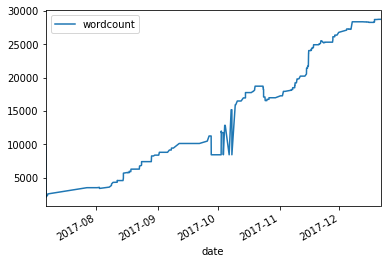

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()
plt.show()

In [45]:
data_list = {'commit':commit_list,
                'date':datestr_list,
                'timestamp':date_list,
                'wordcount':count_list}
df = pd.DataFrame(data=data_list, ).set_index('date')
plt.plot(df['date'],df['wordcount'])


KeyError: 'date'

commit 293
date 293
timestamp 293
wordcount 293


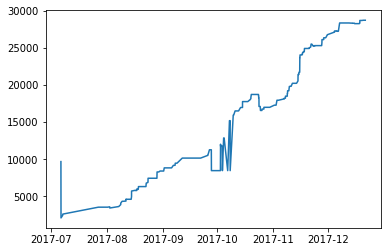

In [54]:
for k in data_list:
    print(k,len(data_list[k]))
# plt.plot(df['date'],df['wordcount'])
# df['commit']
plt.plot(df['wordcount'])


In [25]:
valididx = [i for i in range(len(date_list)) if date_list[i] != '']
print (valididx)

count_list[valididx]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

TypeError: list indices must be integers or slices, not list